
## Loading dataset and packages

In [1]:
import os

import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
from rich import print

%load_ext rich
pd.set_option("display.max_columns", None)

In [2]:
# data = pd.read_csv('../data/spotify_songs.csv')

## Isolating test set

In [3]:
# sample 10% of the data and remove it from the original dataset
# random_sample = data.sample(frac=0.1, random_state=42)
# random_sample.to_csv('../data/spotify_songs_isolated_sample.csv', index=False)
# data = data.drop(random_sample.index)

In [259]:
data = pd.read_csv('../data/spotify_songs_train.csv')

# EDA

### Metadata

In [5]:
data.shape

(29550, 23)

In [6]:
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29550 entries, 0 to 29549
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  29550 non-null  object 
 1   track_name                29545 non-null  object 
 2   track_artist              29545 non-null  object 
 3   track_popularity          29550 non-null  int64  
 4   track_album_id            29550 non-null  object 
 5   track_album_name          29545 non-null  object 
 6   track_album_release_date  29550 non-null  object 
 7   playlist_name             29550 non-null  object 
 8   playlist_id               29550 non-null  object 
 9   playlist_genre            29550 non-null  object 
 10  playlist_subgenre         29550 non-null  object 
 11  danceability              29550 non-null  float64
 12  energy                    29550 non-null  float64
 13  key                       29550 non-null  int64  
 14  loudne

#### Categorical variable:
`track_popularity`, `track_name`, `track_artist`, `track_album_id`, `track_album_name`,
`playlist_name`, `playlist_id`, `playlist_genre`, `playlist_subgenre`

#### Discrete variable:
`track_popularity`, `key`, `mode`

#### Continuous variable:
`danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`, `duration_ms`

**note: `duration_ms` is technically not continuous, but since the range of value is too large we shall treat it as continuous.

In [8]:
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000
mean,42.473536,0.654942,0.697994,5.373198,-6.723118,0.565821,0.106935,0.176092,0.085120,0.189756,0.510630,120.881881,225813.534450
std,24.996766,0.145047,0.181324,3.614061,2.986296,0.495657,0.101502,0.220655,0.224991,0.154041,0.232708,26.887832,60075.936906
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000
25%,24.000000,0.563000,0.580000,2.000000,-8.183750,0.000000,0.040900,0.015100,0.000000,0.092700,0.331000,99.956000,187617.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.171500,1.000000,0.062300,0.080200,0.000016,0.127000,0.512000,121.980500,215933.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.646000,1.000000,0.131000,0.256000,0.004830,0.247000,0.693000,133.940000,253467.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517125.000000


### Missing values

<Axes: >

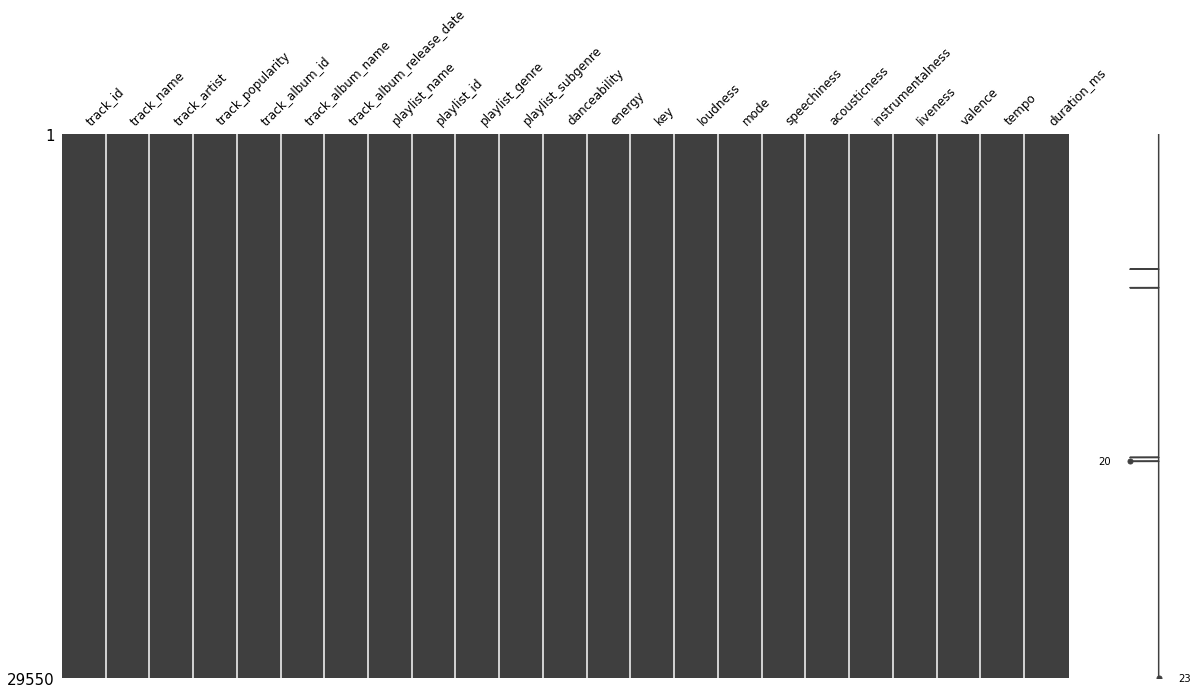

In [9]:
# check missing values
msno.matrix(data, figsize=(20, 10), fontsize=12)

From the graph it seems like there is not a lot of missing data.

In [10]:
data.isnull().sum()


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [11]:
data.isna().sum()


track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

### Duplicates

In [12]:
data.duplicated().sum()

0

In [13]:
data['eda_track_id_artist'] = data['track_id'] + '_' + data['track_artist']
data['eda_track_name_artist'] = data['track_name'] + '_' + data['track_artist']
data['eda_track_id_artist_playlist'] = data['eda_track_id_artist'] + '_' + data['playlist_id']

print("Number of duplicated track id and artist combination is", data['eda_track_id_artist'].duplicated().sum())
print("Number of duplicated track name and artist combination is", data['eda_track_name_artist'].duplicated().sum())
print("Number of duplicated track, artist and playlist combination is", data['eda_track_id_artist_playlist'].duplicated().sum())

# look at the track names that has more than 1 track id
data[data['eda_track_name_artist'].duplicated(keep=False)].sort_values('eda_track_name_artist')

Number of duplicated track id and artist combination is 3722

Number of duplicated track name and artist combination is 5538

Number of duplicated track, artist and playlist combination is 474

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,eda_track_id_artist,eda_track_name_artist,eda_track_id_artist_playlist
6373,5xGxl3Iux0worDz9tLbaDn,#1 Stunna,Big Tymers,0,688cR89wVSFrXVj56N59g6,I Got That Work (Explicit Version),2000-01-01,Dirty South Rap Classics by DJ HOTSAUCE,0tLHH1C4HkWEUCXXSSjbOe,rap,southern hip hop,0.552,0.839,2,-4.984,1,0.2840,0.0150,0.00404,0.2580,0.569,89.070,281960,5xGxl3Iux0worDz9tLbaDn_Big Tymers,#1 Stunna_Big Tymers,5xGxl3Iux0worDz9tLbaDn_Big Tymers_0tLHH1C4HkWE...
5436,7kBdenpTmgWfAz9clmBcok,#1 Stunna,Big Tymers,48,7pe02mW4PQwNJkrmSup7bu,I Got That Work,2000-01-01,Hip-Hop Drive,37i9dQZF1DWUFmyho2wkQU,rap,hip hop,0.552,0.842,8,-4.961,1,0.2850,0.0176,0.00327,0.2580,0.561,89.017,281960,7kBdenpTmgWfAz9clmBcok_Big Tymers,#1 Stunna_Big Tymers,7kBdenpTmgWfAz9clmBcok_Big Tymers_37i9dQZF1DWU...
10880,6aNP9GlBi3VHPXl7w3Qjr9,'39 - 2011 Mix,Queen,46,1GbtB4zTqAsyfZEsm1RZfx,A Night At The Opera (2011 Remaster),1975-11-21,The Queen - La Discografia Completa,3E88dLx4fgFYY70gdGzdnB,rock,album rock,0.524,0.571,8,-9.686,1,0.0273,0.0271,0.00000,0.1110,0.373,101.626,210800,6aNP9GlBi3VHPXl7w3Qjr9_Queen,'39 - 2011 Mix_Queen,6aNP9GlBi3VHPXl7w3Qjr9_Queen_3E88dLx4fgFYY70gd...
13034,65NTcXUtOb27NHKQ4fAcw0,'39 - 2011 Mix,Queen,60,75eP8LZolyNBpqIRyB5pvB,A Night At The Opera (Deluxe Edition 2011 Rema...,1975-11-21,I didn’t know perm stood for permanent (wave),3e6gYPyrTbaB8BWgSHCt5j,rock,permanent wave,0.524,0.571,8,-9.686,1,0.0273,0.0271,0.00000,0.1110,0.373,101.626,210800,65NTcXUtOb27NHKQ4fAcw0_Queen,'39 - 2011 Mix_Queen,65NTcXUtOb27NHKQ4fAcw0_Queen_3e6gYPyrTbaB8BWgS...
7696,6yr8GiTHWvFfi4o6Q5ebdT,'Till I Collapse,Eminem,16,1ftvBBcu7jYIvXyt3JWB8S,The Eminem Show,2002-05-26,Gangster Rap,5joQabz9ys3XPGbSx5CaKv,rap,gangster rap,0.551,0.851,1,-3.277,1,0.1970,0.0748,0.00000,0.0784,0.100,171.411,297893,6yr8GiTHWvFfi4o6Q5ebdT_Eminem,'Till I Collapse_Eminem,6yr8GiTHWvFfi4o6Q5ebdT_Eminem_5joQabz9ys3XPGbS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,NaN,NaN,NaN
8343,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,NaN,NaN,NaN
8344,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,NaN,NaN,NaN
17570,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,NaN,NaN,NaN


Some tracks can have more than 1 track_id because a song can be released in different album by the same artist.

In [14]:
data['eda_playlist_id_track_artist'] = data['playlist_id'] + '_' + data['track_name']+ '_' + data['track_artist']
data['eda_playlist_name_track_artist'] = data['playlist_name'] + '_' + data['track_name']+ '_' + data['track_artist']

print("Number of unique playlist id, track name and artist name combination is", data['eda_playlist_id_track_artist'].nunique())
print("Number of unique playlist name, track name and artist name combination is", data['eda_playlist_name_track_artist'].nunique())

# look at the playlist that has the same track name and artist name
data[data['eda_playlist_id_track_artist'].duplicated(keep=False)].sort_values(by='eda_playlist_id_track_artist')

Number of unique playlist id, track name and artist name combination is 29023

Number of unique playlist name, track name and artist name combination is 29014

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,eda_track_id_artist,eda_track_name_artist,eda_track_id_artist_playlist,eda_playlist_id_track_artist,eda_playlist_name_track_artist
24011,2dk5HQv2V6hEVeGGlPvCFA,Sharpness,Jamie Woon,52,6ITNDvsL7pS6nv93kwHgwq,Making Time,2015-10-30,Neo-Soul Essentials,0DIwi1dMI59NItQtiNcevy,r&b,neo soul,0.849,0.583,6,-7.865,0,0.0565,0.2590,0.16700,0.1020,0.666,98.011,207133,2dk5HQv2V6hEVeGGlPvCFA_Jamie Woon,Sharpness_Jamie Woon,2dk5HQv2V6hEVeGGlPvCFA_Jamie Woon_0DIwi1dMI59N...,0DIwi1dMI59NItQtiNcevy_Sharpness_Jamie Woon,Neo-Soul Essentials_Sharpness_Jamie Woon
23953,0g6NSuyHTmz4DLwoGt5Fil,Sharpness,Jamie Woon,0,5NFRqIhoJ2zW1TeQOQMhXc,Sharpness,2015-08-11,Neo-Soul Essentials,0DIwi1dMI59NItQtiNcevy,r&b,neo soul,0.855,0.583,6,-8.178,0,0.0652,0.2780,0.17400,0.0991,0.647,98.002,207422,0g6NSuyHTmz4DLwoGt5Fil_Jamie Woon,Sharpness_Jamie Woon,0g6NSuyHTmz4DLwoGt5Fil_Jamie Woon_0DIwi1dMI59N...,0DIwi1dMI59NItQtiNcevy_Sharpness_Jamie Woon,Neo-Soul Essentials_Sharpness_Jamie Woon
7742,4hLDCpCrPzTZ2BqJJBJXEA,Ether,Nas,21,1H1l1x4y10wp848cBq2Lig,Stillmatic,2001-12-18,Gangster Rap Workout,0ZRwrJ2EDGyKR6YgQPWXeO,rap,gangster rap,0.573,0.831,7,-5.586,1,0.4330,0.0401,0.00000,0.0909,0.766,76.352,277707,4hLDCpCrPzTZ2BqJJBJXEA_Nas,Ether_Nas,4hLDCpCrPzTZ2BqJJBJXEA_Nas_0ZRwrJ2EDGyKR6YgQPWXeO,0ZRwrJ2EDGyKR6YgQPWXeO_Ether_Nas,Gangster Rap Workout_Ether_Nas
7724,0t8FEAs1I7v2PLPMHS4mgv,Ether,Nas,0,4Bql8tIDwUopC8YRyZY4H5,Stillmatic,2001-12-18,Gangster Rap Workout,0ZRwrJ2EDGyKR6YgQPWXeO,rap,gangster rap,0.573,0.831,7,-5.586,1,0.4330,0.0401,0.00000,0.0909,0.766,76.352,277707,0t8FEAs1I7v2PLPMHS4mgv_Nas,Ether_Nas,0t8FEAs1I7v2PLPMHS4mgv_Nas_0ZRwrJ2EDGyKR6YgQPWXeO,0ZRwrJ2EDGyKR6YgQPWXeO_Ether_Nas,Gangster Rap Workout_Ether_Nas
7721,4MxZW1XEcPuIZmkANsJabC,Party Up,DMX,7,10memku7dGZY14rvvlNpPv,...And Then There Was X,1999-01-01,Gangster Rap Workout,0ZRwrJ2EDGyKR6YgQPWXeO,rap,gangster rap,0.534,0.933,11,-3.282,1,0.3660,0.0835,0.00000,0.3940,0.478,202.058,268867,4MxZW1XEcPuIZmkANsJabC_DMX,Party Up_DMX,4MxZW1XEcPuIZmkANsJabC_DMX_0ZRwrJ2EDGyKR6YgQPWXeO,0ZRwrJ2EDGyKR6YgQPWXeO_Party Up_DMX,Gangster Rap Workout_Party Up_DMX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,NaN,NaN,NaN,NaN,NaN
8343,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,NaN,NaN,NaN,NaN,NaN
8344,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,NaN,NaN,NaN,NaN,NaN
17570,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,NaN,NaN,NaN,NaN,NaN


It looks like some song can be released twice by the artist in different albums and can be included in the same playlist, which is why the playlist+track_name+artist combination is duplicated.

In [15]:
data['eda_track_album_id_artist_track_id'] = data['track_album_id'] + '_' + data['track_artist'] + '_' + data['track_id']
data['eda_track_album_name_artist_track_id'] = data['track_album_name'] + '_' + data['track_artist'] + '_' + data['track_id']

print("Number of unique track album id and artist name combination is", data['eda_track_album_id_artist_track_id'].nunique())
print("Number of unique track album name and artist name combination is", data['eda_track_album_name_artist_track_id'].nunique())

# look at the name of the album that has the same artist name but different album id
data[data['eda_track_album_name_artist_track_id'].duplicated(keep=False)].sort_values(by='eda_track_album_name_artist_track_id')

Number of unique track album id and artist name combination is 25827

Number of unique track album name and artist name combination is 25827

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,eda_track_id_artist,eda_track_name_artist,eda_track_id_artist_playlist,eda_playlist_id_track_artist,eda_playlist_name_track_artist,eda_track_album_id_artist_track_id,eda_track_album_name_artist_track_id
24020,3kxfsdsCpFgN412fpnW85Y,Redbone,Childish Gambino,18,4xnq1L6P551Qcb9gBXNMK7,"""Awaken, My Love!""",2016-12-02,Sexy Soul 2020,5EMARioe9z9eKOeWIAC2JW,r&b,neo soul,0.745,0.356,1,-10.425,1,0.0941,0.1720,0.00943,0.1230,0.607,160.033,326933,3kxfsdsCpFgN412fpnW85Y_Childish Gambino,Redbone_Childish Gambino,3kxfsdsCpFgN412fpnW85Y_Childish Gambino_5EMARi...,5EMARioe9z9eKOeWIAC2JW_Redbone_Childish Gambino,Sexy Soul 2020_Redbone_Childish Gambino,4xnq1L6P551Qcb9gBXNMK7_Childish Gambino_3kxfsd...,"""Awaken, My Love!""_Childish Gambino_3kxfsdsCpF..."
19307,3kxfsdsCpFgN412fpnW85Y,Redbone,Childish Gambino,18,4xnq1L6P551Qcb9gBXNMK7,"""Awaken, My Love!""",2016-12-02,Contemporary Urban,6wyJ4bsjZaUKa9f6GeZlAO,r&b,urban contemporary,0.745,0.356,1,-10.425,1,0.0941,0.1720,0.00943,0.1230,0.607,160.033,326933,3kxfsdsCpFgN412fpnW85Y_Childish Gambino,Redbone_Childish Gambino,3kxfsdsCpFgN412fpnW85Y_Childish Gambino_6wyJ4b...,6wyJ4bsjZaUKa9f6GeZlAO_Redbone_Childish Gambino,Contemporary Urban_Redbone_Childish Gambino,4xnq1L6P551Qcb9gBXNMK7_Childish Gambino_3kxfsd...,"""Awaken, My Love!""_Childish Gambino_3kxfsdsCpF..."
17814,5YzA563GXTuwQaRq24z1k5,Como Antes (feat. Wisin),Yandel,67,3tAW0n99Uq2IlvzBsW3tQq,#Update,2017-09-08,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.813,0.876,1,-4.278,0,0.1720,0.1820,0.00000,0.3940,0.746,94.987,210773,5YzA563GXTuwQaRq24z1k5_Yandel,Como Antes (feat. Wisin)_Yandel,5YzA563GXTuwQaRq24z1k5_Yandel_3nH8aytdqNeRbcRC...,3nH8aytdqNeRbcRCg3dw9q_Como Antes (feat. Wisin...,latin hip hop_Como Antes (feat. Wisin)_Yandel,3tAW0n99Uq2IlvzBsW3tQq_Yandel_5YzA563GXTuwQaRq...,#Update_Yandel_5YzA563GXTuwQaRq24z1k5
17329,5YzA563GXTuwQaRq24z1k5,Como Antes (feat. Wisin),Yandel,67,3tAW0n99Uq2IlvzBsW3tQq,#Update,2017-09-08,Reggaeton Rewind,37i9dQZF1DXco4ODkIraMD,latin,reggaeton,0.813,0.876,1,-4.278,0,0.1720,0.1820,0.00000,0.3940,0.746,94.987,210773,5YzA563GXTuwQaRq24z1k5_Yandel,Como Antes (feat. Wisin)_Yandel,5YzA563GXTuwQaRq24z1k5_Yandel_37i9dQZF1DXco4OD...,37i9dQZF1DXco4ODkIraMD_Como Antes (feat. Wisin...,Reggaeton Rewind_Como Antes (feat. Wisin)_Yandel,3tAW0n99Uq2IlvzBsW3tQq_Yandel_5YzA563GXTuwQaRq...,#Update_Yandel_5YzA563GXTuwQaRq24z1k5
2138,2iJuuzV8P9Yz0VSurttIV5,Scream & Shout,will.i.am,73,6edYDxspt9uQj21mbAfFIb,#willpower,2013-01-01,post teen pop,6rjxP7GQKoqqgoakzxl3PY,pop,post-teen pop,0.772,0.685,5,-6.849,1,0.0696,0.0190,0.00009,0.1310,0.501,130.033,283400,2iJuuzV8P9Yz0VSurttIV5_will.i.am,Scream & Shout_will.i.am,2iJuuzV8P9Yz0VSurttIV5_will.i.am_6rjxP7GQKoqqg...,6rjxP7GQKoqqgoakzxl3PY_Scream & Shout_will.i.am,post teen pop_Scream & Shout_will.i.am,6edYDxspt9uQj21mbAfFIb_will.i.am_2iJuuzV8P9Yz0...,#willpower_will.i.am_2iJuuzV8P9Yz0VSurttIV5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7338,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8343,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8344,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17570,3VKFip

Some song of the same artist are included in different playlists.

In [16]:
# some house-keeping, drop all columns that has eda in the column name
data = data.drop(columns=[col for col in data.columns if 'eda' in col])

In [17]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print(numerical_features)

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

### Outliers

In [18]:
# check below 1 percentile and above 99 percentile of the data
data.describe(percentiles=[0.01, 0.99])

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000
mean,42.473536,0.654942,0.697994,5.373198,-6.723118,0.565821,0.106935,0.176092,0.085120,0.189756,0.510630,120.881881,225813.534450
std,24.996766,0.145047,0.181324,3.614061,2.986296,0.495657,0.101502,0.220655,0.224991,0.154041,0.232708,26.887832,60075.936906
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000
1%,0.000000,0.271490,0.204000,0.000000,-15.966040,0.000000,0.026300,0.000060,0.000000,0.036249,0.052445,74.517000,112645.800000
50%,45.000000,0.672000,0.721000,6.000000,-6.171500,1.000000,0.062300,0.080200,0.000016,0.127000,0.512000,121.980500,215933.000000
99%,89.000000,0.926000,0.982000,11.000000,-1.962490,1.000000,0.449000,0.894000,0.918000,0.801000,0.961000,191.916100,431878.030000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517125.000000


In [19]:
numerical_features_to_plot = [
    "danceability",
    "energy",
    "valence",
    "loudness",
    "tempo",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "duration_ms",
]


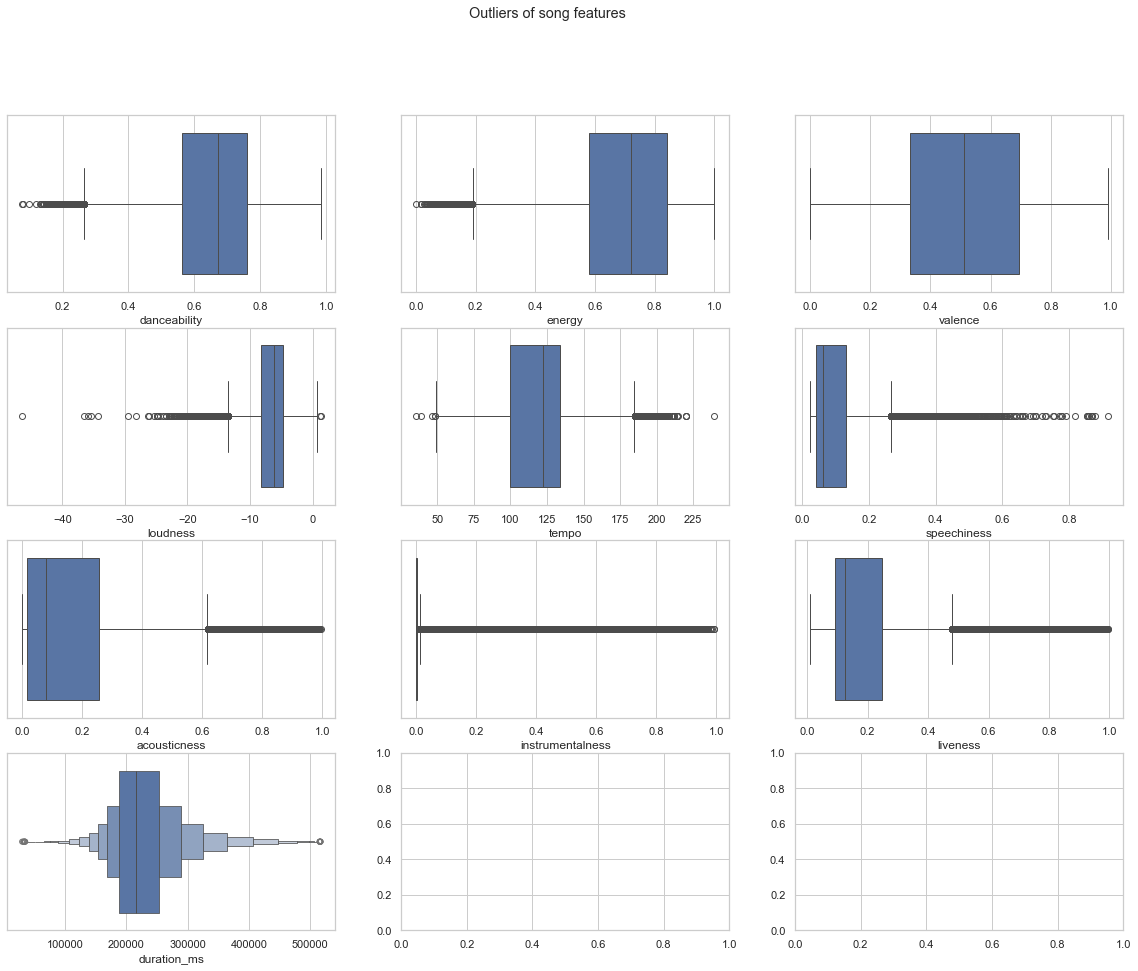

In [20]:
# plot outliers of all numerical features on the same plot using seaborn

sns.set(style="whitegrid")
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle("Outliers of song features")

for i, feature in enumerate(numerical_features_to_plot):
    if feature == "duration_ms":
        sns.boxenplot(x=data[feature], ax=ax[i // 3, i % 3])
    else:
        sns.boxplot(x=data[feature], ax=ax[i // 3, i % 3])

plt.show()

## Distribution

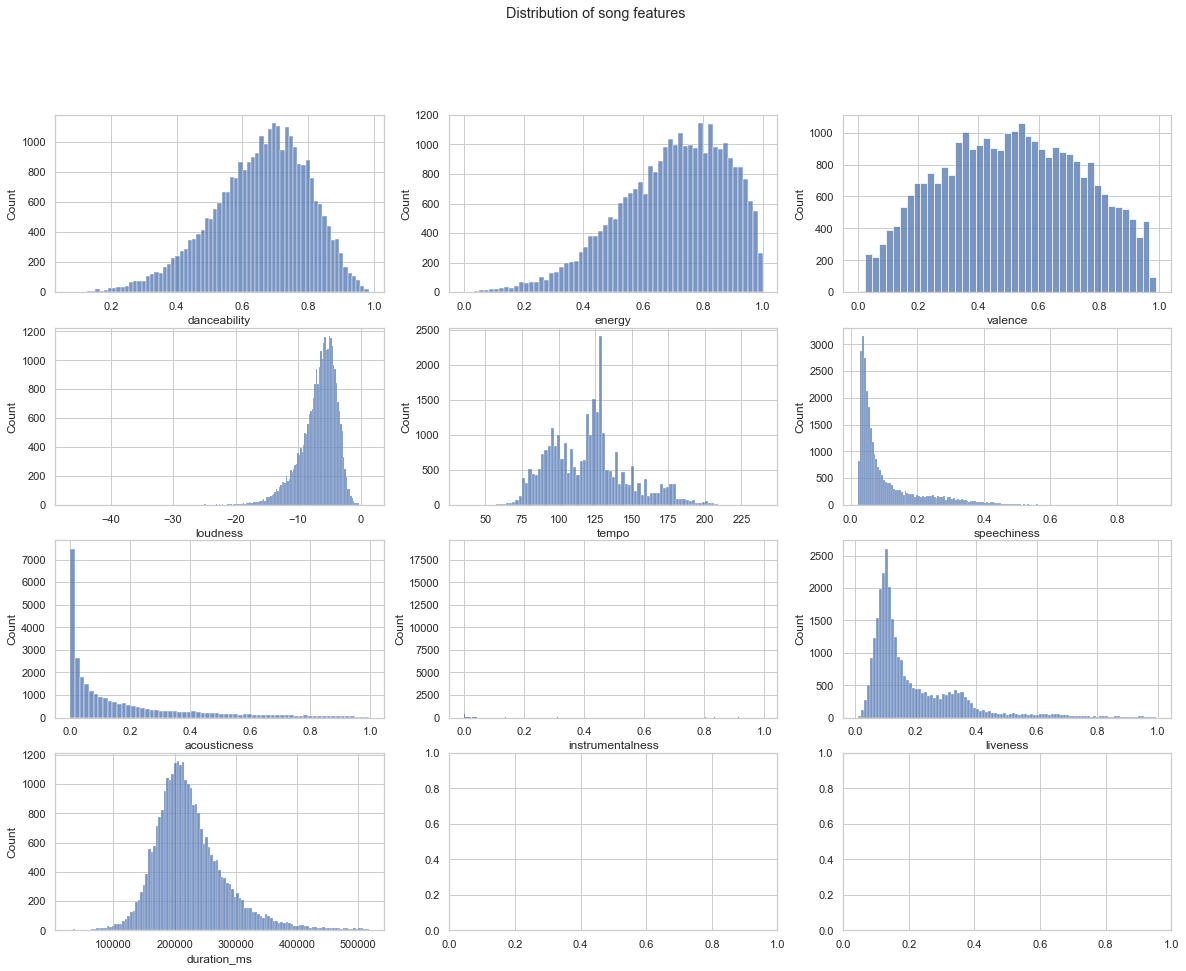

In [21]:
# Optimized plot for the distribution of all numerical features using loops
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle("Distribution of song features")

for i, feature in enumerate(numerical_features_to_plot):
    sns.histplot(data[feature], ax=ax[i // 3, i % 3])

# Adjust y-axis scale
for i in range(3):
    for j in range(3):
        ax[i, j].autoscale()

plt.show()


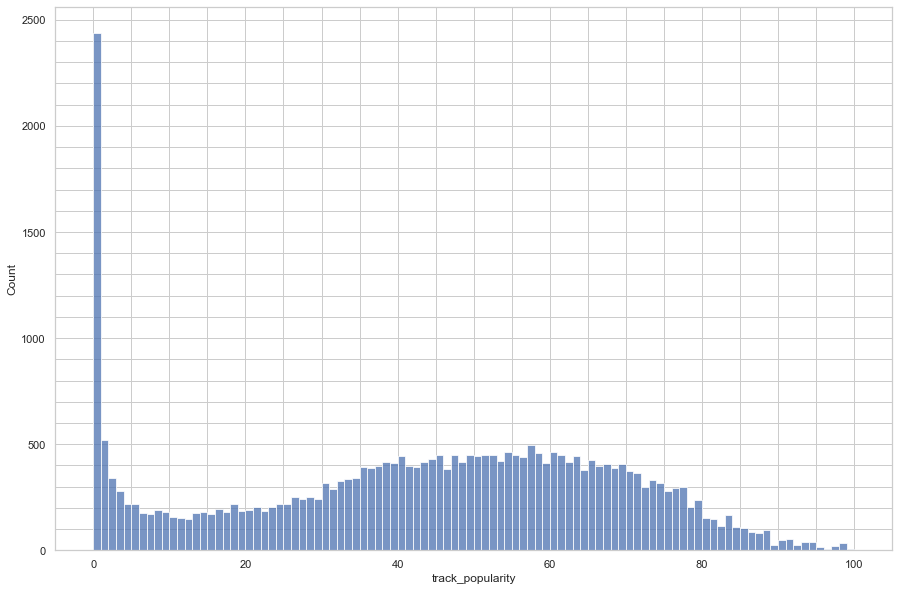

In [22]:
# distribution of track popularity
plt.figure(figsize=(15, 10))

# put fine grid on the plot
plt.grid(True, which="both")
plt.minorticks_on()

sns.histplot(data["track_popularity"], bins=100)
plt.show()

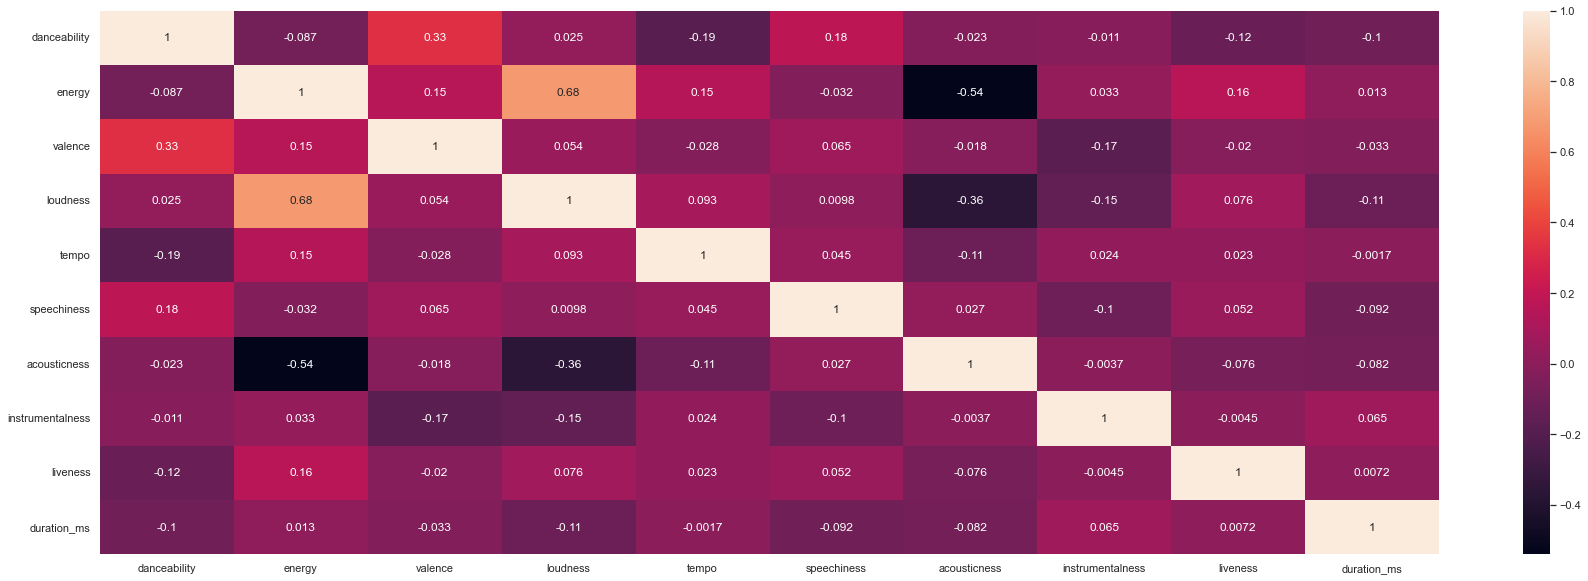

In [23]:
data_correlation = data[numerical_features_to_plot].corr()
plt.figure(figsize=(30, 10))
sns.heatmap(data_correlation, annot=True)
plt.show()

## Time data

In [260]:
# split the release date by hyphen
data['eda_year'] = data['track_album_release_date'].str.split('-').str[0]
data['eda_month'] = data['track_album_release_date'].str.split('-').str[1]
data['eda_day'] = data['track_album_release_date'].str.split('-').str[2]

In [267]:
print("Number of rows that has month and day missing: ") 
print(data[['eda_month','eda_day']].isna().sum())

Number of rows that has month and day missing:

eda_month    1678
eda_day      1708
dtype: int64

In [268]:
# create feature from track_album_release_date
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'])

data['eda_track_album_release_year'] = data['track_album_release_date'].dt.year
data['eda_track_album_release_month'] = data['track_album_release_date'].dt.month
data['eda_track_album_release_day'] = data['track_album_release_date'].dt.day
data['eda_track_album_release_day_of_week'] = data['track_album_release_date'].dt.dayofweek
data['eda_track_album_release_quarter'] = data['track_album_release_date'].dt.quarter
data['eda_track_album_release_10_years'] = data['track_album_release_date'].dt.year // 10 * 10

In [271]:
# check if there are dates in the future
(data['track_album_release_date'] > pd.to_datetime('today')).sum()

0

### Number of songs distribution

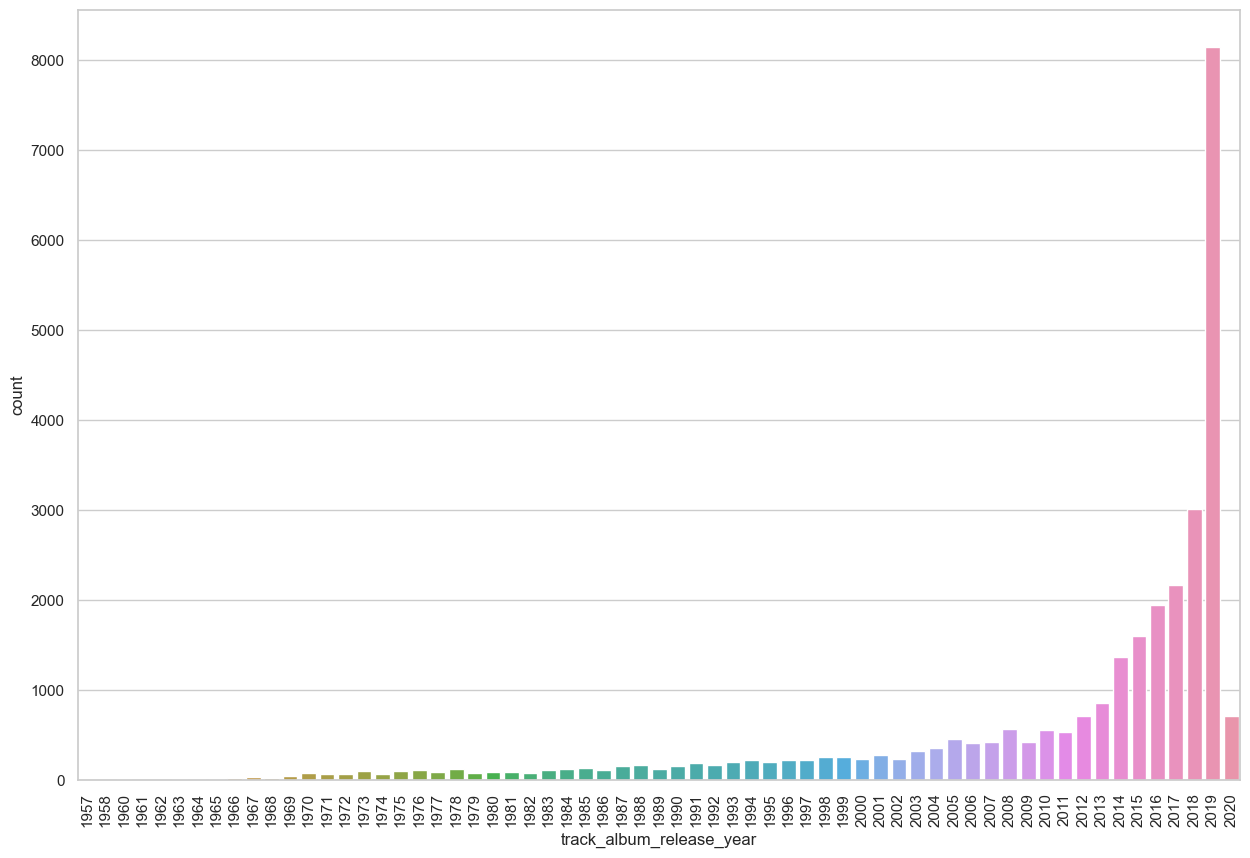

In [218]:
# plot number of songs released by year
plt.figure(figsize=(15, 10))
sns.countplot(x='track_album_release_year', data=data)
plt.xticks(rotation=90)
plt.show()


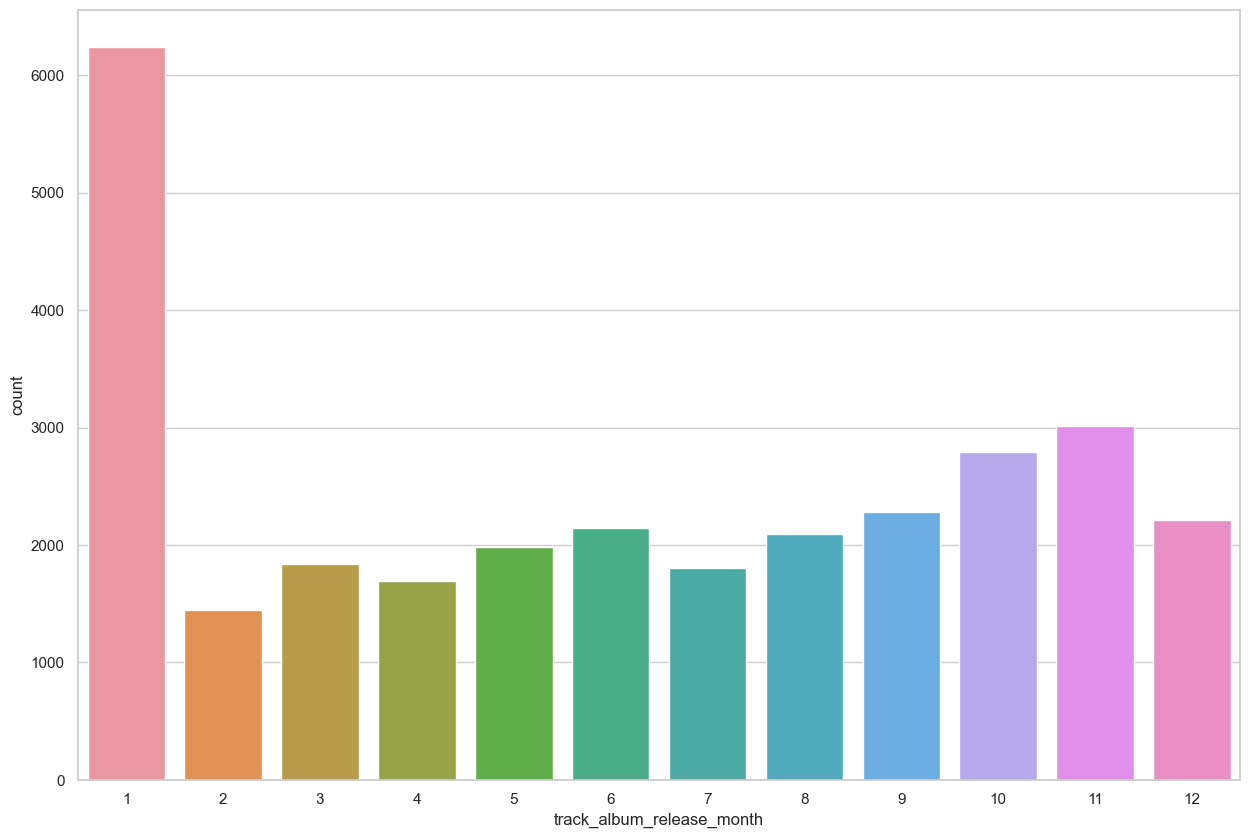

In [224]:
# plot number of songs released by month
plt.figure(figsize=(15, 10))
sns.countplot(x='track_album_release_month', data=data)
plt.show()


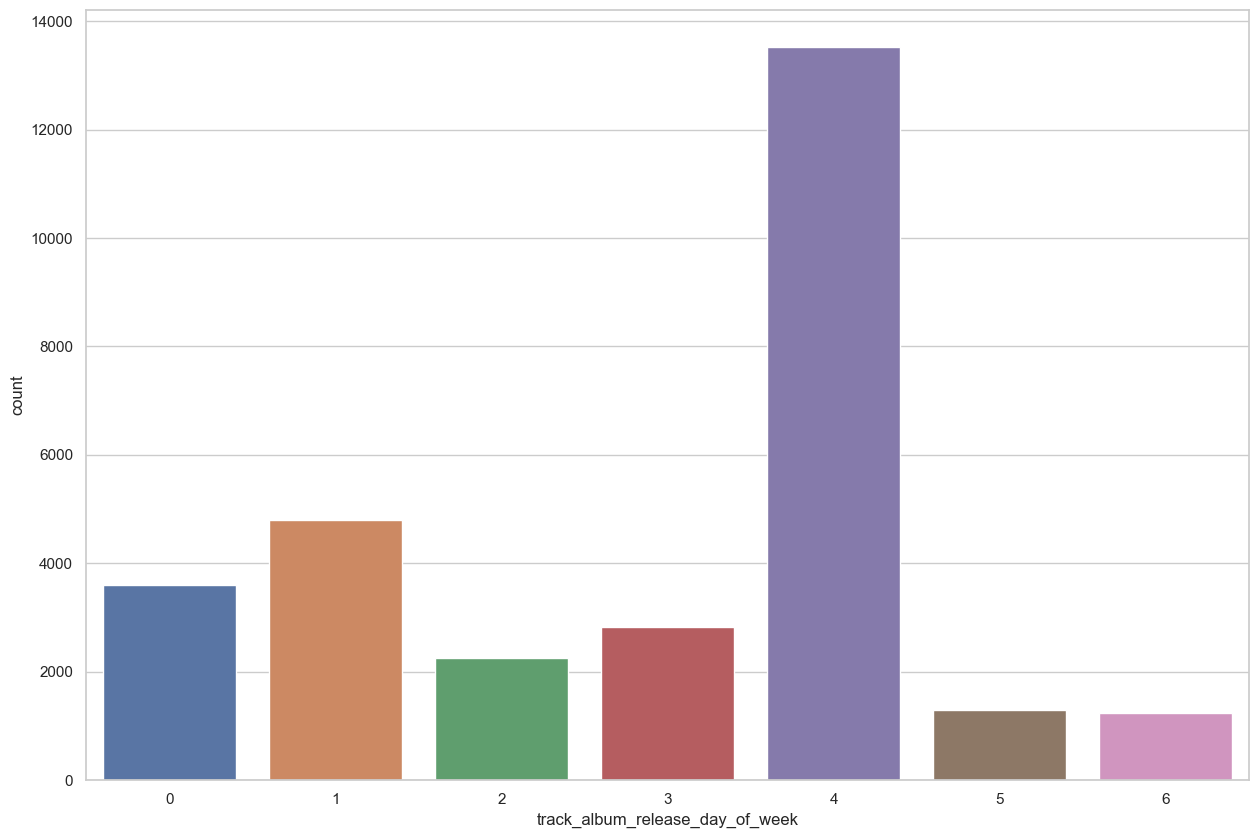

In [223]:
# plot number of songs released by day of week
plt.figure(figsize=(15, 10))
sns.countplot(x='track_album_release_day_of_week', data=data)
plt.show()

### Track popularity over time

In [307]:
import ipywidgets as widgets
from ipywidgets import interact

# Get unique playlist genres
playlist_genres = data['playlist_genre'].unique()

# checkbox widget
genre_checkbox = widgets.SelectMultiple(
    options=playlist_genres,
    description='Select Genres',
    rows=len(playlist_genres),
    layout=widgets.Layout(width='20%')
)

@interact(playlist_genre=genre_checkbox)
def plot_popularity_over_years(playlist_genre):
    plt.figure(figsize=(40, 10))
    sns.lineplot(x='eda_track_album_release_year', y='track_popularity', hue='playlist_genre', 
                 data=data[data['playlist_genre'].isin(playlist_genre)])
    plt.show()


interactive(children=(SelectMultiple(description='Select Genres', layout=Layout(width='20%'), options=('pop', …

In [292]:
# most popular sub-genre over time, make it interactive
# Get unique playlist sub-genres
playlist_subgenres = data['playlist_subgenre'].unique()

# checkbox widget
subgenre_checkbox = widgets.SelectMultiple(
    options=playlist_subgenres,
    description='Select Sub-Genres',
    rows=len(playlist_subgenres),
    layout=widgets.Layout(width='20%')
)

@interact(playlist_subgenre=subgenre_checkbox)
def plot_popularity_over_years(playlist_subgenre):
    plt.figure(figsize=(40, 10))
    sns.lineplot(x='eda_track_album_release_year', y='track_popularity', hue='playlist_subgenre', 
                 data=data[data['playlist_subgenre'].isin(playlist_subgenre)])
    plt.show()


interactive(children=(SelectMultiple(description='Select Sub-Genres', layout=Layout(width='20%'), options=('da…

In [286]:
# artist with highest average track popularity by 10 years
most_popular_artist = data.groupby(['eda_track_album_release_10_years', 'track_artist'])['track_popularity'].mean().reset_index()
most_popular_artist = most_popular_artist.sort_values(by=['eda_track_album_release_10_years', 'track_popularity'], ascending=[True, False])
most_popular_artist = most_popular_artist.groupby('eda_track_album_release_10_years').head(1)
most_popular_artist = most_popular_artist.sort_values(by='eda_track_album_release_10_years')
most_popular_artist

,eda_track_album_release_10_years,track_artist,track_popularity
0,1950,Elvis Presley,73.000000
58,1960,The Turtles,74.000000
67,1970,AC/DC,76.555556
747,1980,a-ha,83.000000
1343,1990,Spice Girls,79.000000
2109,2000,Jason Mraz,82.000000
10186,2010,Trevor Daniel,97.000000
11161,2020,Justin Bieber,95.000000


In [284]:
# artist with highest average track popularity by year
most_popular_artist_by_year = data.groupby(['eda_track_album_release_year', 'track_artist'])['track_popularity'].mean().reset_index()
most_popular_artist_by_year = most_popular_artist_by_year.sort_values(by=['eda_track_album_release_year', 'track_popularity'], ascending=[True, False])
most_popular_artist_by_year = most_popular_artist_by_year.groupby('eda_track_album_release_year').first().reset_index()
most_popular_artist_by_year

,eda_track_album_release_year,track_artist,track_popularity
0,1957,Ray Charles,59.0
1,1958,Elvis Presley,73.0
2,1960,Etta James,20.0
3,1961,Chavela Vargas,47.0
4,1962,Booker T. & the M.G.'s,64.0
...,...,...,...
58,2016,Post Malone,84.0
59,2017,Offset,81.0
60,2018,Trevor Daniel,97.0
61,2019,The Weeknd,96.5


### Subgenre over time

In [241]:
# check the date of the oldest song and newest song by subgenre
data.groupby('playlist_subgenre')['track_album_release_date'].agg(['min', 'max']).sort_values(by='min')

,min,max
playlist_subgenre,,
urban contemporary,1957-01-01,2020-01-17
classic rock,1957-03-01,2020-01-10
neo soul,1960-01-01,2020-01-17
album rock,1963-05-27,2019-04-26
hard rock,1963-07-08,2020-01-17
permanent wave,1964-10-02,2020-01-17
latin hip hop,1965-01-01,2020-01-17
southern hip hop,1967-09-01,2019-12-24
post-teen pop,1969-11-02,2020-01-10


Oldest subgenre song in this dataset is urban contemporary and newest is trap.

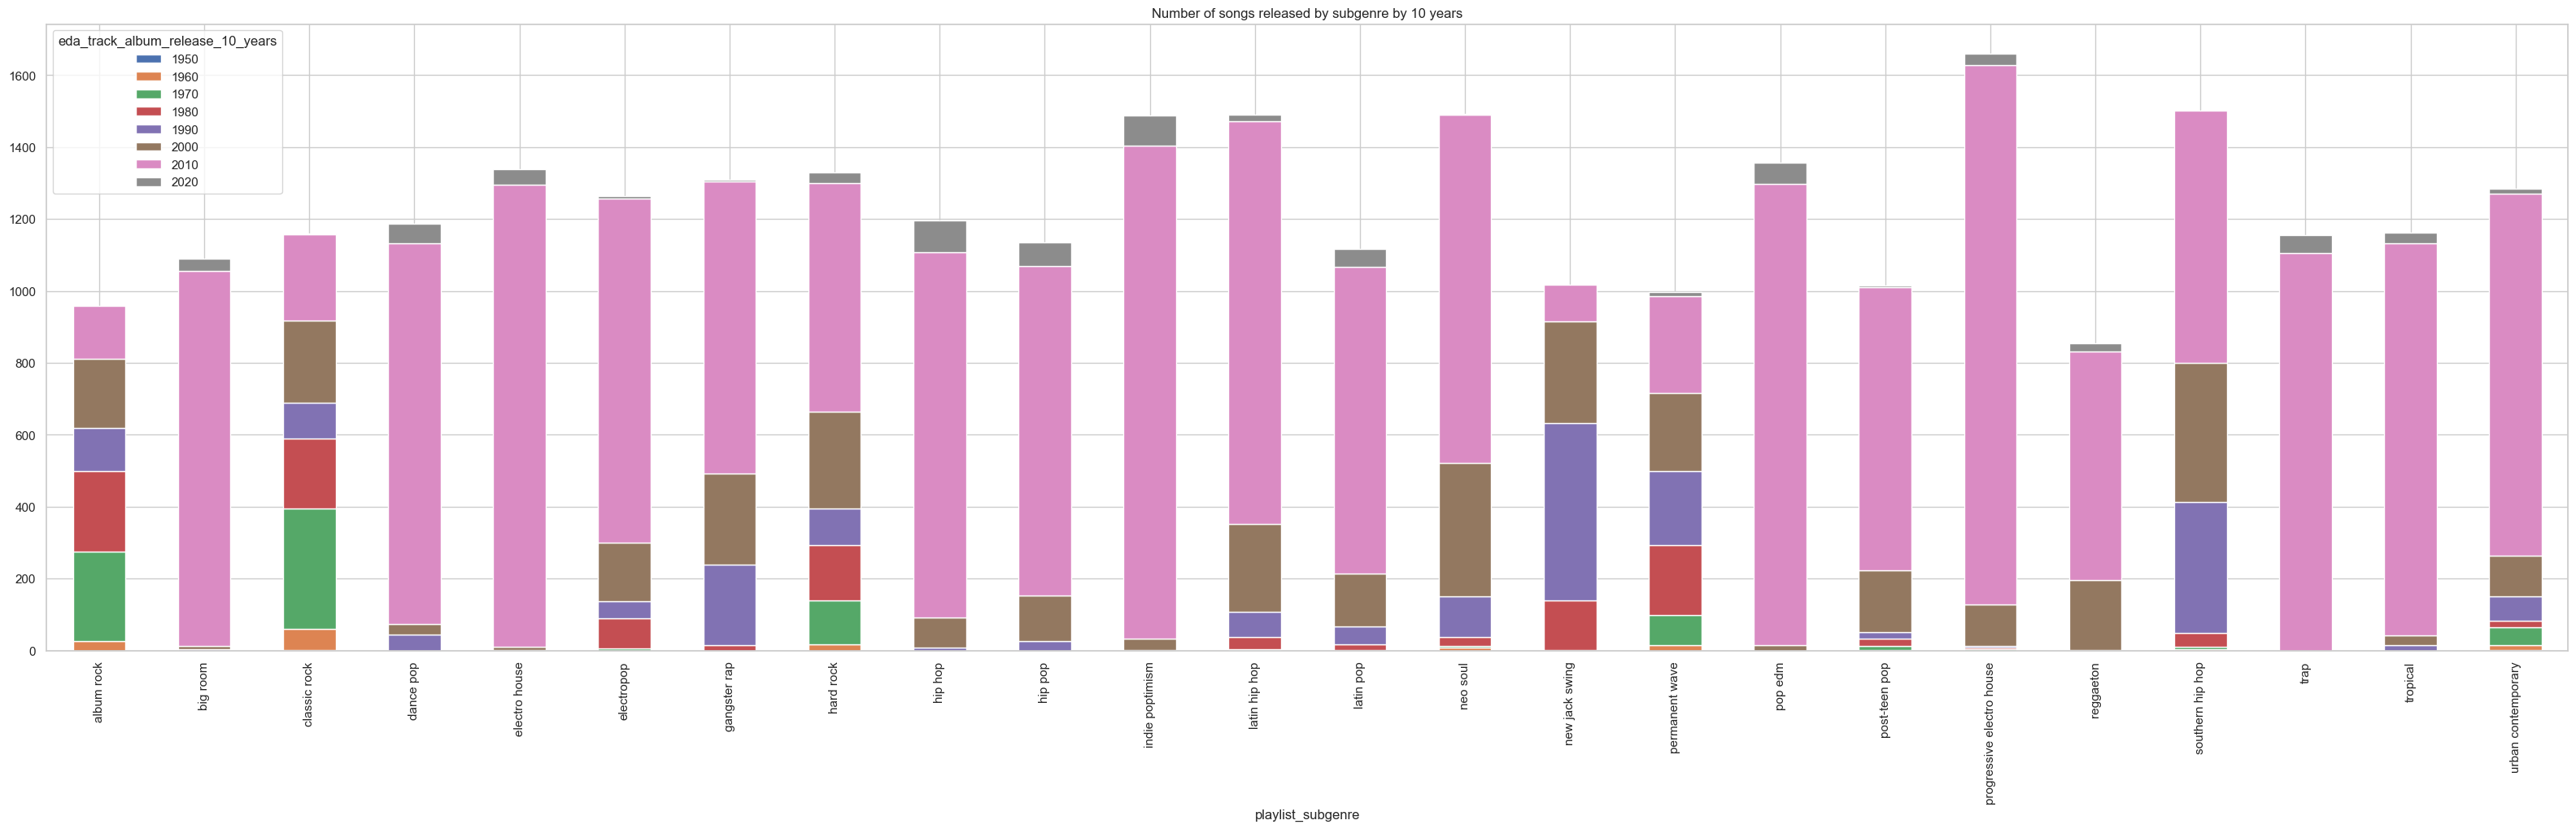

In [283]:
# number of songs by subgenre released by year
data.groupby(['playlist_subgenre', 'eda_track_album_release_10_years']).size().unstack().plot(kind='bar', stacked=True, figsize=(40, 10))
plt.title("Number of songs released by subgenre by 10 years")
plt.show()

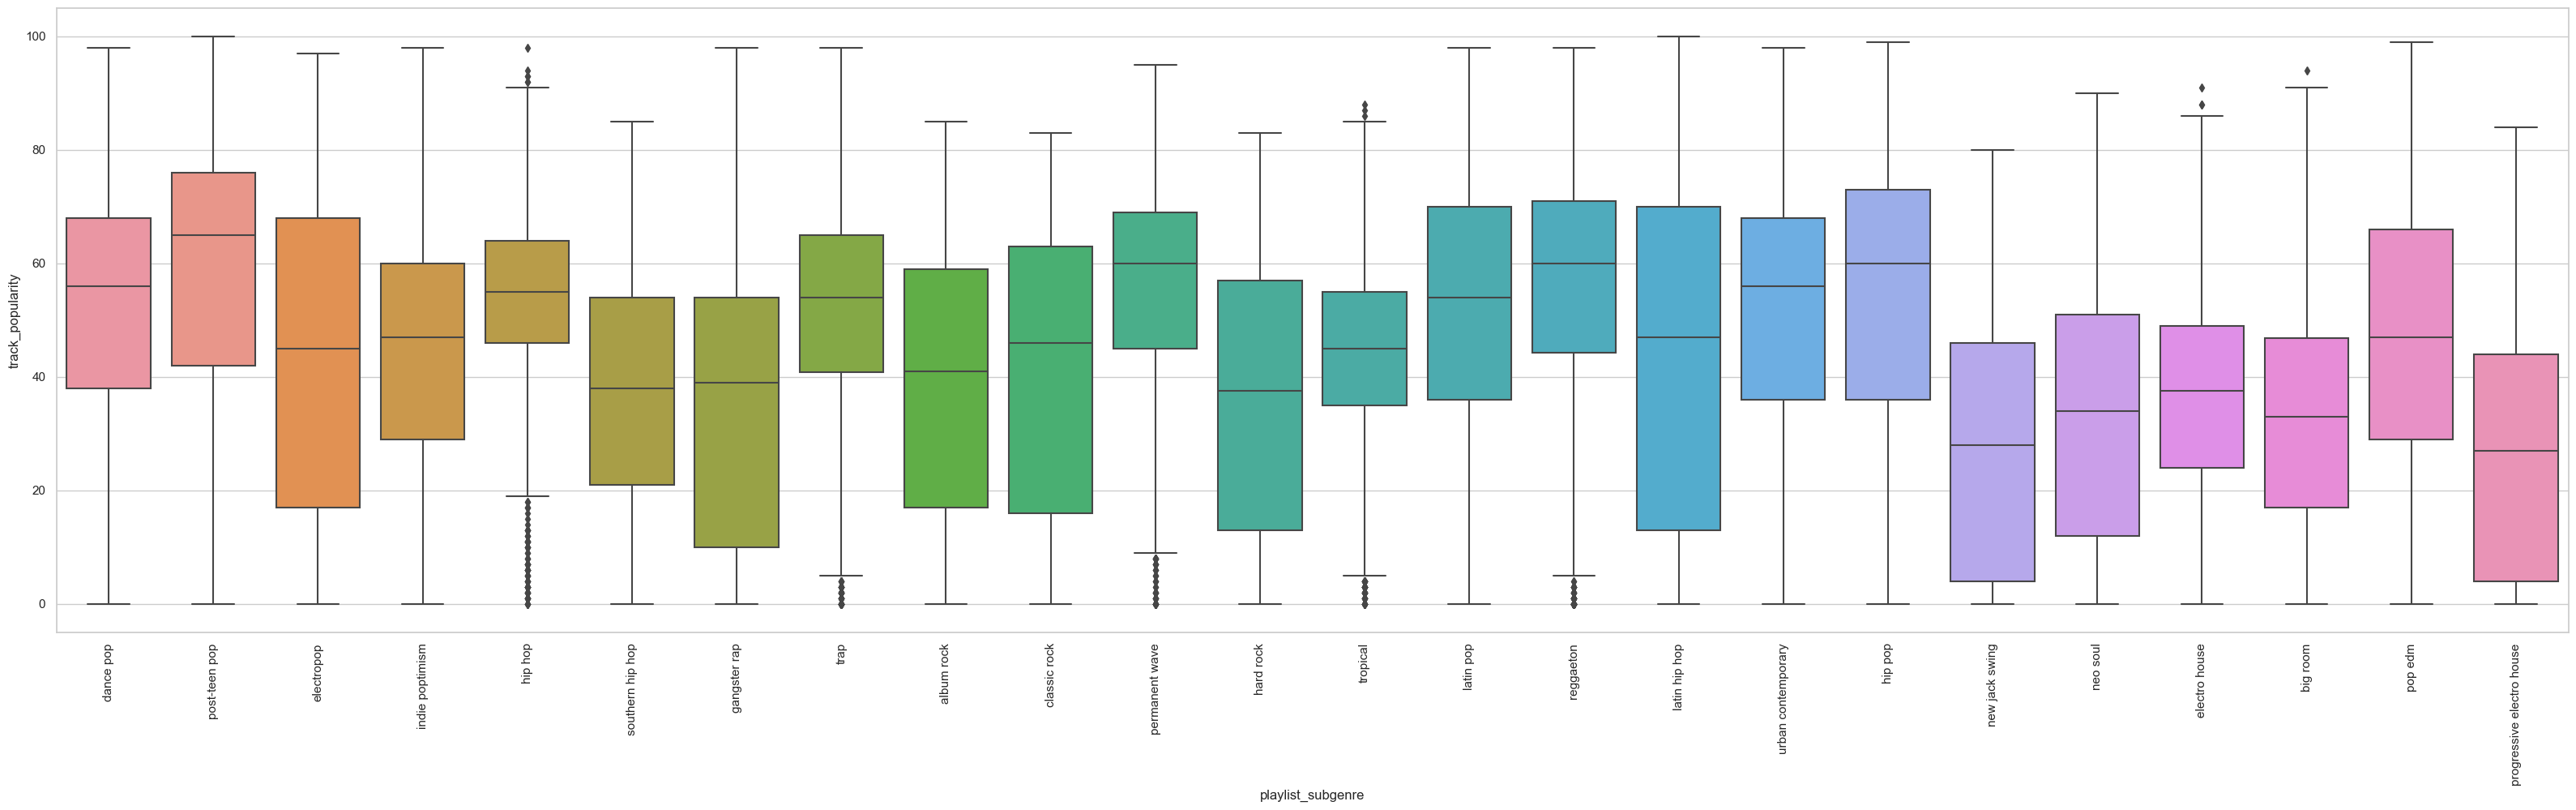

In [274]:
# 
plt.figure(figsize=(40, 10))
plt.title('Track popularity by subgenre')
sns.boxplot(x='playlist_subgenre', y='track_popularity', data=data)
plt.xticks(rotation=90)
plt.show()

### Artist over time

In [303]:
# most active artist by 10 years
most_active_artist = data.groupby(['eda_track_album_release_10_years', 'track_artist']).size().reset_index()
most_active_artist = most_active_artist.sort_values(by=['eda_track_album_release_10_years', 0], ascending=[True, False])
most_active_artist = most_active_artist.groupby('eda_track_album_release_10_years').head(1)
most_active_artist = most_active_artist.sort_values(by='eda_track_album_release_10_years')
most_active_artist

,eda_track_album_release_10_years,track_artist,0
0,1950,Elvis Presley,1
15,1960,Creedence Clearwater Revival,10
244,1970,Queen,86
748,1980,オメガトライブ,41
753,1990,2Pac,45
1495,2000,50 Cent,45
7554,2010,Martin Garrix,138
11358,2020,Selena Gomez,13


In [305]:
# most active artist by years
most_active_artist_by_year = data.groupby(['eda_track_album_release_year', 'track_artist']).size().reset_index()
most_active_artist_by_year = most_active_artist_by_year.sort_values(by=['eda_track_album_release_year', 0], ascending=[True, False])
most_active_artist_by_year = most_active_artist_by_year.groupby('eda_track_album_release_year').head(1)
most_active_artist_by_year

,eda_track_album_release_year,track_artist,0
0,1957,Little Richard,1
2,1958,Elvis Presley,1
4,1960,Etta James,2
6,1961,Chavela Vargas,1
7,1962,Booker T. & the M.G.'s,2
...,...,...,...
8111,2016,The Chainsmokers,38
8836,2017,Kygo,21
9580,2018,Bad Bunny,40
12183,2019,Ed Sheeran,39


In [ ]:
# house keeping
data = data.drop(columns=[col for col in data.columns if 'eda' in col])